In [1]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_excel('fine.xlsx')
dataset.head()

,LABEL,cleaned
0,EP,You are very beautiful
1,EP,Nice
2,EP,Nice video jitu bhai
3,EP,Super
4,EP,Supar comedy


In [3]:
print(len(dataset['LABEL']))
print(len(dataset['cleaned']))

6341
6341


In [4]:
X = dataset['cleaned'].values  #X IS INDEPENDEDN VARIABLE
Y = dataset['LABEL'].values

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    Y,
                                                    test_size = 0.3,
                                                    random_state = 0)



In [6]:
# Make Machine Learning Pipeline with TfidfVectorizer and MultinomialNB
tfidf_vect = TfidfVectorizer(analyzer='char', ngram_range=(2,3))
model = LogisticRegression(solver = 'lbfgs')
text_clf = Pipeline([('tfidf', tfidf_vect),
                    ('clf', model),])

In [7]:
text_clf.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='char', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(2, 3), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling

In [8]:
# Make predictions on unseen test data with trained classifier
predictions = text_clf.predict(X_test)
predictions

array(['EP', 'EP', 'OT', ..., 'GM', 'GM', 'GM'], dtype=object)

In [9]:
# Measure accuracy
accuracy_score(y_test,predictions)

0.9132947976878613

In [10]:
# alternate train and test set through cross validation to yield a more trustworthy accuracy
scores = cross_val_score(text_clf, X, Y, cv=5)
print("Mean cross-validation accuracy: " + str(scores.mean()))

Mean cross-validation accuracy: 0.8935485354473205


In [11]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          EM       0.00      0.00      0.00         5
          EP       0.90      0.96      0.93       710
          GM       0.90      0.92      0.91       758
          GP       0.97      0.99      0.98       233
          HM       0.89      0.45      0.60        94
          HP       0.90      0.56      0.69        16
          OT       1.00      0.93      0.96        87

    accuracy                           0.91      1903
   macro avg       0.80      0.69      0.72      1903
weighted avg       0.91      0.91      0.91      1903



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'LI Confusion Matrix of LR')

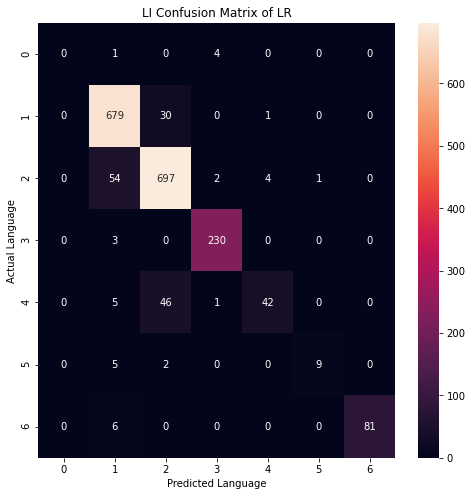

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 8))
cm = confusion_matrix(y_test, predictions)

ax = sns.heatmap(cm, annot = True, fmt = "d")

ax.set_xlabel('Predicted Language')
ax.set_ylabel('Actual Language')
ax.set_title('LI Confusion Matrix of LR')

In [13]:
txt= ['congresh ni ak दीधी',
      'maru name kazi zuber chhe',
      'nice',
      'mera name kya he',
      'ðŸ˜€ðŸ˜€ðŸ˜€ðŸ˜']

pred = text_clf.predict(txt)
for i in pred :

    print(i)

GM
GM
EP
HM
OT
